In [7]:
import numpy as np
import pandas as pd
from IPython.display import display
from __future__ import print_function #python 2 & 3
import visuals as vs

%matplotlib inline

full_data = pd.read_csv('titanic_data.csv')
display(full_data[:3])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [11]:
outcomes = full_data['Survived']
data = full_data.drop('Survived', axis = 1)

def accuracy_score(truth, pred):
    if len(truth) == len(pred):
        return "Predictions have an accuracy of {:.2f}%.".format((truth==pred).mean()*100)
    else :
        return "Prediction and truth counts don't match"

predictions = pd.Series(np.ones(5, dtype=int))
print(accuracy_score(outcomes[:5], predictions))

Predictions have an accuracy of 60.00%.


In [18]:
#prediction that none survived
def predictions_0(data):
    return pd.Series(np.zeros(len(data)), dtype=int)

accuracy_score(outcomes, predictions_0(data))

'Predictions have an accuracy of 61.62%.'

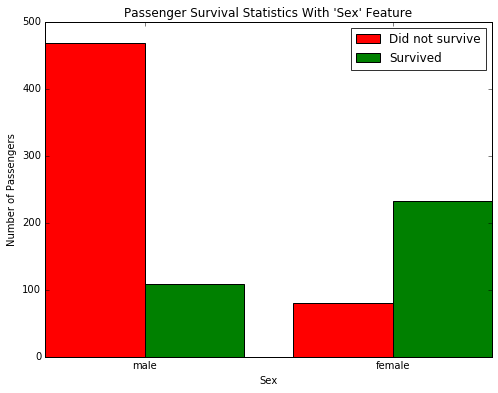

In [17]:
vs.survival_stats(data, outcomes, 'Sex')

In [20]:
#prediction that a passenger survives iff they're female
def prediction_1(data):
    return data['Sex'].map(lambda sex: sex == "female")

accuracy_score(outcomes, prediction_1(data))

'Predictions have an accuracy of 78.68%.'

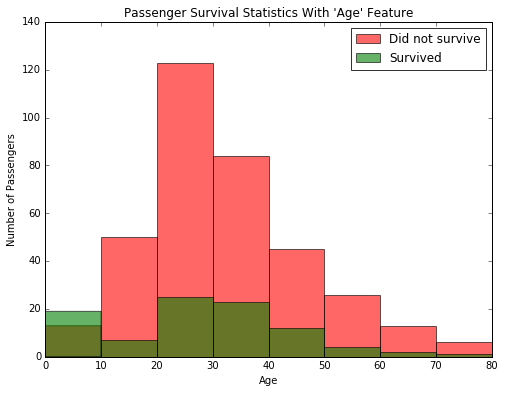

In [24]:
#plot of survival as f(age and sex) - plot is an overlay.
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])

In [60]:
#prediction that children below 10 and women survived
import math
def prediction_2(data):
    f_age = lambda x : (not math.isnan(x.Age)) and x.Age < 13
    return data.apply(lambda x: x.Sex == "female" or f_age(x), axis=1 )

accuracy_score(outcomes, prediction_2(data))

'Predictions have an accuracy of 79.24%.'

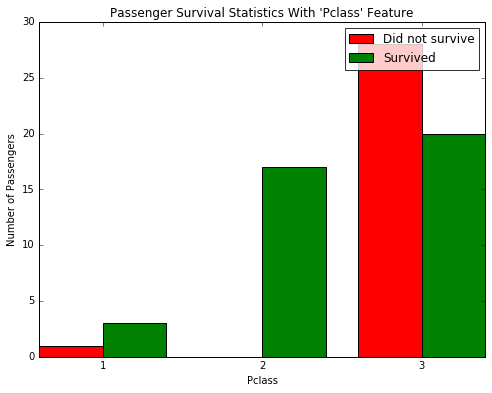

In [90]:
#iteratively add conditions so the survival rate > 50%
vs.survival_stats(data, 
                  outcomes, 
                  'Pclass', 
                  ['Age < 13'])
# we can filter our children with Pclass 3

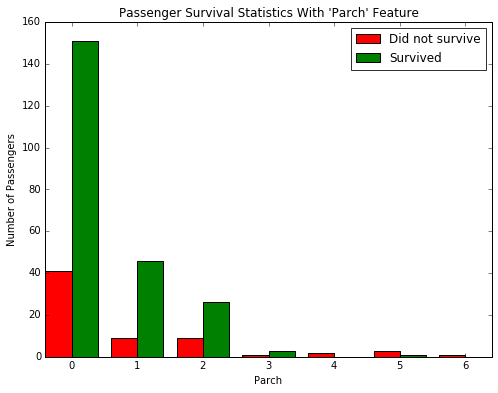

In [91]:
vs.survival_stats(data, 
                  outcomes, 
                  'Parch', 
                  ["Sex == 'female'", 'SibSp < 3'])
#we can filter out women with more than 3 siblings

In [92]:
#prediction that children and women with certain characteristics survive
import math
def prediction_3(data):
    f_female = lambda x : x.Sex == "female" and x.SibSp < 3 and x.Parch < 3
    f_children = lambda x : (not math.isnan(x.Age)) and x.Age < 13 and x.Pclass < 3
        
    return data.apply(lambda x: f_female(x) or f_children(x), axis=1)

accuracy_score(outcomes, prediction_3(data))

'Predictions have an accuracy of 81.37%.'

#### Question 5
Decision trees can be used to predict the ads that one might be interested in. Outcome variable is given an ad, will a particular person click on it ? Relevant features to target the ad include age and gender.